### Proyecto Final ML


**Por:** Rebeca Buttner, Rodrigo Figueredo

**Problema de investigación:** Qué variables caracterizan a cada género a estudiantes de secundaria de Argentina.

**Origen de datos:** <a href="http://aprenderdatos.educacion.gob.ar/binarg/RpWebEngine.exe/Portal?BASE=DOCE&lang=esp"> Link datos</a>
# INTRODUCCIÓN

**Problemática**

La brecha de género es una problemática que está siendo ampliamente estudiada desde todos los ángulos posibles. Esta representa una medida que muestra la distancia entre mujeres y hombres respecto a un mismo indicador. [(Arámburu 2017)](https://crpd.cepal.org/3/sites/crpd3/files/presentations/panel2_marcelaeternod.pdf)

**Motivación**

Investigar aquellas variables que pueden significar o no diferencias para los niños nos lleva a un mejor entendimiento de la problemática. Como fin último encontrar mecanismos para poder achicar esta brecha.

**Metodología**

Para aportar a esta materia haremos un análisis acerca de las circunstancias alrededor de los niños de secundaria Argentinos. Con datos variados como ser su procedencia, entorno en la casa, sus notas entre otros. Con el fin de averiguar si usando combinaciones estas variables es posible pronosticar con relativa precisión mediante Regresión Lineal o Árbol de decisiones el género del niño.


# OBTENCIÓN DE LOS DATOS
Obtenemos los datos de [la base de datos del gobierno argentino](https://www.argentina.gob.ar/educacion/aprender2016/bases-de-microdatos).

Entrada: link de la "Base de microdatos 12º año (secundaria - censo)" obtenido desde la página.

Salida: obtencion del archivo en formato zip dentro del colab

In [ ]:
!wget https://www.argentina.gob.ar/sites/default/files/aprender2016-secundaria-12.zip


--2023-10-11 09:28:29--  https://www.argentina.gob.ar/sites/default/files/aprender2016-secundaria-12.zip
Resolving www.argentina.gob.ar (www.argentina.gob.ar)... 172.67.75.35, 104.26.5.183, 104.26.4.183, ...
Connecting to www.argentina.gob.ar (www.argentina.gob.ar)|172.67.75.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28587342 (27M) [application/zip]
Saving to: ‘aprender2016-secundaria-12.zip’

aprender2016-secund 100%[===================>]  27.26M  --.-KB/s    in 0.1s    

2023-10-11 09:28:30 (285 MB/s) - ‘aprender2016-secundaria-12.zip’ saved [28587342/28587342]



Entrada: Ubicación del archivo .zip

Salida: Archivo .csv descomprimido

In [ ]:
!unzip /content/aprender2016-secundaria-12.zip

Archive:  /content/aprender2016-secundaria-12.zip
  inflating: aprender2016-secundaria-12.csv  


Importamos las librerías:

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

Entrada: Ubicación del archivo .csv que se leera, con encabezado y delimitadores de punto y coma. Debido a una advertencia de que las columnas tienen tipo de datos mezclados se colocó el parámetro low_memory=False.

Salida: Data frame con los datos

In [ ]:
df = pd.read_csv('/content/aprender2016-secundaria-12.csv', header=0, delimiter=';',low_memory=False)

# ANÁLISIS EXPLORATORIO DE DATOS


Entrada: Sumario del DataFrame.

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331852 entries, 0 to 331851
Columns: 190 entries, Ap1 to isocioacs
dtypes: int64(11), object(179)
memory usage: 481.0+ MB
None


 Data frame con 331.852 filas y 190 columnas. Donde 11 columnas son enteros y 179 no se detectó el tipo de columna adecuado. El peso del archivo es de 481MB

Entrada: Descripción de las columnas del DataFrame de tipo númerico.

In [ ]:
df.describe()

,cod_provincia,sector,ambito,iclima,autoconlengua,autoconmate,qvulneraa,qvulneraap,isocioa,isocioal,isocioam
count,331852.000000,331852.000000,331852.000000,331852.000000,331852.000000,331852.000000,331852.000000,331852.000000,331852.000000,331852.000000,331852.000000
mean,31.086725,1.408860,1.071155,1.396288,1.471626,1.551698,2.499587,2.499678,1.736129,1.206306,1.372922
std,30.184778,0.491747,0.257319,1.253474,1.209074,1.138578,1.117901,1.118173,1.054531,1.442794,1.360113
min,2.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,-1.000000,1.000000
50%,14.000000,1.000000,1.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000
75%,54.000000,2.000000,1.000000,2.000000,2.000000,2.000000,3.000000,4.000000,2.000000,2.000000,2.000000
max,94.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000



Entrada: Lista con tipos de atributos excluídos anteriormente por el método "describe".

In [ ]:
df.describe(include=["object", "bool"])

,Ap1,Ap2,Ap3a,Ap3b,Ap3c,Ap4,Ap5,Ap6,Ap7,Ap8,...,mpuntaje,mdesemp,cspondera,cspuntaje,csdesemp,cnpondera,cnpuntaje,cndesemp,isocioacn,isocioacs
count,331852,331852,331852,331852,331852,331852,331852,331852,331852,331852,...,331852,331852,331852,331852,331852,331852,331852,331852,331852,331852
unique,8,5,14,14,14,11,9,6,10,10,...,237849,5,9629,245285,5,10097,210011,5,5,5
top,2,2,1,1,1,4,3,2,4,4,...,,1,,,4,,,3,2,2
freq,135294,145102,255800,239867,236292,90715,104109,147777,77730,71965,...,53852,107543,60788,60788,97932,83850,83850,135421,147704,162150


Entrada: Vista previa de los primeros 5 registros

In [ ]:
df.head(5)

,Ap1,Ap2,Ap3a,Ap3b,Ap3c,Ap4,Ap5,Ap6,Ap7,Ap8,...,iclima,autoconlengua,autoconmate,qvulneraa,qvulneraap,isocioa,isocioal,isocioam,isocioacn,isocioacs
0,,,,,,,,,,,...,-1,-1,-1,3,1,-1,-1,-1,-1,-1
1,,,,,,,,,,,...,-1,-1,-1,4,3,-1,-1,-1,-1,-1
2,,,,,,,,,,,...,-1,-1,-1,4,2,-1,-1,-1,-1,-1
3,,,,,,,,,,,...,-1,-1,-1,4,2,-1,-1,-1,-1,-1
4,,,,,,,,,,,...,-1,-1,-1,3,2,-1,-1,-1,-1,-1


Notamos muchos valores vacíos y negativos. Por otro lado para entender a que hace referencia cada columna se debe utilizar el diccionario que es proveído en la página bajo el subtítulo “*Diccionario 12º año (secundaria- censo)*” https://www.argentina.gob.ar/educacion/aprender2016/bases-de-microdatos.

Según hagamos uso de estas variables se explicarán durante la investigación y se harán más análisis exploratorios.

#PREPROCESAMIENTO
Viendo un primer esbozo de la información notamos filas  totalmente vacías.
Como no existe una columna que funja de id empezaremos asignando  un índice para poder facilitar las transformaciones.

Entrada: Data frame obtenido del csv en donde se agrega una columna indice

Salida: El data frame con la columna de indice llamado idEncuesta


In [ ]:
# Generamos una columna id para cada fila del archivo de encuesta
df_resetId = df.rename_axis('idEncuesta').reset_index()
df_resetId.head()

,idEncuesta,Ap1,Ap2,Ap3a,Ap3b,Ap3c,Ap4,Ap5,Ap6,Ap7,...,iclima,autoconlengua,autoconmate,qvulneraa,qvulneraap,isocioa,isocioal,isocioam,isocioacn,isocioacs
0,0,,,,,,,,,,...,-1,-1,-1,3,1,-1,-1,-1,-1,-1
1,1,,,,,,,,,,...,-1,-1,-1,4,3,-1,-1,-1,-1,-1
2,2,,,,,,,,,,...,-1,-1,-1,4,2,-1,-1,-1,-1,-1
3,3,,,,,,,,,,...,-1,-1,-1,4,2,-1,-1,-1,-1,-1
4,4,,,,,,,,,,...,-1,-1,-1,3,2,-1,-1,-1,-1,-1


Haciendo una primera revisión del diccionario vemos que el Ap2 es la variable objetivo ya que responde a la pregunta “ ¿Sos varón o mujer?”. Las posibles respuestas son:

```
1	→ Varón
2	→ Mujer
-1	→ En blanco
-9	→ No respondió ninguna pregunta del cuestionario complementario
```

Por ende, solamente las filas que contengan respuesta de 1 o 2 son de interés para nuestra investigación.


Para poder filtrar primero necesitamos convertir las variables a numérico

Entrada: Lista con el indice de columnas

Salida: Data frame con los datos convertidos a númerico

In [ ]:
cols = df.columns
df_resetId[cols] = df_resetId[cols].apply(pd.to_numeric, errors='coerce')
df_resetId.dtypes

idEncuesta      int64
Ap1           float64
Ap2           float64
Ap3a          float64
Ap3b          float64
               ...   
isocioa         int64
isocioal        int64
isocioam        int64
isocioacn     float64
isocioacs     float64
Length: 191, dtype: object

Entrada: Mantener los registros que contengan 1 y 2 en la columna Ap2

Salida: Data frame reducido en 72.285, quedan 259.567 registros

In [ ]:
df_resetId_noblanc = df_resetId[df_resetId['Ap2'].isin([1, 2])]
df_resetId_noblanc.shape

(259567, 191)

Realizamos un histograma inicial para por un lado verificar que ahora solo contenga valores de 1 o 2.

Además notamos que existe una mayor cantidad de datos de mujeres que de hombres

Entrada: renombramos a la columna "Ap2" como "Genero"

In [ ]:
df_resetId_noblanc.rename(columns={'Ap2': 'Genero'})

,idEncuesta,Ap1,Genero,Ap3a,Ap3b,Ap3c,Ap4,Ap5,Ap6,Ap7,...,iclima,autoconlengua,autoconmate,qvulneraa,qvulneraap,isocioa,isocioal,isocioam,isocioacn,isocioacs
3159,3159,-1.0,1.0,1.0,1.0,1.0,4.0,-1.0,2.0,5.0,...,2,3,2,4,4,2,2,2,2.0,2.0
3165,3165,-1.0,2.0,1.0,1.0,1.0,5.0,2.0,2.0,2.0,...,2,3,3,4,4,1,-1,1,NaN,1.0
3171,3171,-1.0,2.0,1.0,1.0,-1.0,6.0,4.0,2.0,4.0,...,2,2,1,4,2,2,2,2,2.0,2.0
3184,3184,-1.0,1.0,-1.0,1.0,-1.0,3.0,3.0,2.0,6.0,...,2,2,2,4,4,3,3,3,3.0,3.0
3195,3195,-1.0,1.0,-1.0,-1.0,-1.0,4.0,3.0,2.0,6.0,...,2,1,1,4,4,3,3,3,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331847,331847,5.0,2.0,1.0,2.0,2.0,5.0,4.0,1.0,1.0,...,2,3,2,2,2,1,1,1,1.0,1.0
331848,331848,5.0,1.0,1.0,1.0,1.0,5.0,2.0,2.0,-1.0,...,2,3,1,2,2,2,-1,-1,NaN,2.0
331849,331849,5.0,1.0,7.0,7.0,7.0,5.0,1.0,3.0,5.0,...,2,3,2,2,2,2,2,-1,2.0,NaN
331850,331850,5.0,2.0,1.0,1.0,1.0,4.0,2.0,2.0,3.0,...,-1,2,2,3,3,2,2,2,2.0,2.0


Entrada: Diccionario para convertir los datos para el gráfico
Salida: Una tabla unicamente con los valores de Genero

In [ ]:
dicGenero = {'Genero':{1:'Varón', 2:'Mujer'}}
EstudiantesGenero = df_resetId_noblanc[['Genero']]
EstudiantesGenero = EstudiantesGenero.replace(dicGenero)

Entrada: Gráfico de barras con la cantidad de valores por cada dato

<Axes: xlabel='Genero', ylabel='count'>

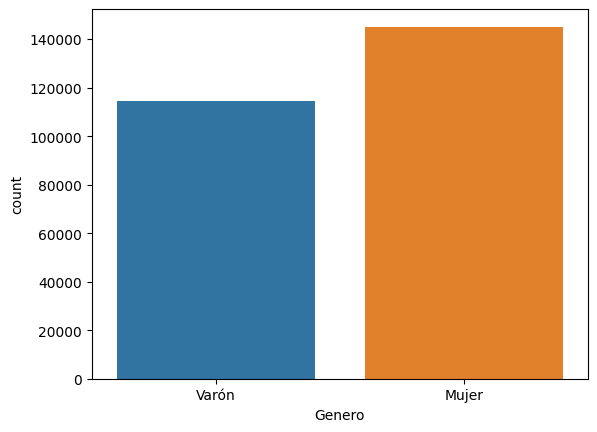

In [ ]:
sns.countplot(x="Genero", data=EstudiantesGenero)

### Columnas eliminadas

Por otro lado, haciendo un análisis conceptual de las preguntas vemos que algunas columnas no serán relevantes de entrada.


**Ap13	→ “¿Estás embarazada?”**

 se debe descartar para esta investigación debido a que esta tiene correlación directa a nuestra variable objetivo.


**cod_provincia 	→  "Jurisdicción"**

se descarta debido a que es información referencial a la toma de datos y no aporta a la investigación

**ponder, lpondera, mpondera, cspondera, cnpondera → "Factor de expansión"**

Son los factores calculados para dar un peso más exacto a la hora de calcular datos agregados. Esto debido a que se trata de un censo y se conoce por aproximación la falta de respuesta de cierto grupo. Lo cual debido al caracter de esta investigación no será necesario.

Entrada: Lista de columnas que se eliminarán

Salida: Data frame con 7 columnas menos

In [ ]:
columnasAEliminar=['Ap13','cod_provincia','ponder', 'lpondera', 'mpondera', 'cspondera', 'cnpondera']
df_clean = df_resetId_noblanc.drop(columnasAEliminar,  axis=1)
df_clean.shape

(259567, 184)

In [ ]:
# Eliminamos Nulos si hubiese
df_clean.dropna()
df_clean.shape

(259567, 184)

## Transformaciones según tipo de dato

Viendo las primeras filas de nuestra información, notamos que existen muchos negativos. Estos negativos según la información proporcionada por el censo son datos perdidos, por distintas formas de no respuesta. Debido a la gran cantidad de datos con los que contamos consideramos pertinente omitir toda columna que contenga uno o más datos perdidos.

Para eso empezamos aplicando el tipo correcto de tipo de dato para poder proseguir con el filtro.


In [ ]:
# # # Recorremos todas las columnas donde inicen con ('Ap') para cambiar el tipo de datos
col_dePreguntas = []

for column in df_clean.columns:
    if(column.startswith("Ap")):
      col_dePreguntas.append(column)
      df_clean[column] = pd.to_numeric(df_clean[column], downcast='integer', errors='coerce')

df_clean.dtypes

idEncuesta      int64
Ap1              int8
Genero        float64
Ap3a             int8
Ap3b             int8
               ...   
isocioa         int64
isocioal        int64
isocioam        int64
isocioacn     float64
isocioacs     float64
Length: 184, dtype: object

In [ ]:
# Durante el recorrido guardamos las preguntas en una lista que al contar terminan siendo 161 preguntas de la Encuensta
len(col_dePreguntas)

162

In [ ]:
df_clean

,idEncuesta,Ap1,Genero,Ap3a,Ap3b,Ap3c,Ap4,Ap5,Ap6,Ap7,...,iclima,autoconlengua,autoconmate,qvulneraa,qvulneraap,isocioa,isocioal,isocioam,isocioacn,isocioacs
3159,3159,-1,1.0,1,1,1,4,-1,2,5,...,2,3,2,4,4,2,2,2,2.0,2.0
3165,3165,-1,2.0,1,1,1,5,2,2,2,...,2,3,3,4,4,1,-1,1,NaN,1.0
3171,3171,-1,2.0,1,1,-1,6,4,2,4,...,2,2,1,4,2,2,2,2,2.0,2.0
3184,3184,-1,1.0,-1,1,-1,3,3,2,6,...,2,2,2,4,4,3,3,3,3.0,3.0
3195,3195,-1,1.0,-1,-1,-1,4,3,2,6,...,2,1,1,4,4,3,3,3,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331847,331847,5,2.0,1,2,2,5,4,1,1,...,2,3,2,2,2,1,1,1,1.0,1.0
331848,331848,5,1.0,1,1,1,5,2,2,-1,...,2,3,1,2,2,2,-1,-1,NaN,2.0
331849,331849,5,1.0,7,7,7,5,1,3,5,...,2,3,2,2,2,2,2,-1,2.0,NaN
331850,331850,5,2.0,1,1,1,4,2,2,3,...,-1,2,2,3,3,2,2,2,2.0,2.0


In [ ]:
# .ge(): Esta función se utiliza para probar si cada elemento del DataFrame es mayor o igual a un valor.

# .all(1): Esta función se utiliza para comprobar si todos los valores del DataFrame son True.
# Devuelve una serie de booleanos. El argumento 1indica que la verificación debe realizarse por filas

df_aprende = df_clean[df_clean.select_dtypes(include=[np.number]).ge(0).all(1)]
df_aprende.shape

(0, 184)

Luego de aplicar este filtro satisfactoriamente vemos que nos quedan 29.483 filas. Que es una cantidad de datos lo suficientemente amplia para poder hacer la investigación.

In [ ]:
colparaelArbol = {'Ap1':'RangoEdad', 'Ap2':'Genero', 'Ap3a':'Nacionalidad', 'Ap10c':'TareasHogar', 'Ap10d':'CultivasParaHogar', 'Ap11':'TrabajaFueraCasa', 'Ap12':'TieneHijo',
                  'Ap39a':'HaceDeporte', 'Ap39b':'LeeLibro'}
df_aprende.head()

,idEncuesta,Ap1,Genero,Ap3a,Ap3b,Ap3c,Ap4,Ap5,Ap6,Ap7,...,iclima,autoconlengua,autoconmate,qvulneraa,qvulneraap,isocioa,isocioal,isocioam,isocioacn,isocioacs


En base al diccionario también se puede notar que contamos con cuatro tipos de datos. Ordinales, nominales, binarias y numéricas. Debido al tipo de modelos que usaremos, necesitamos hacer transformaciones acordes a cada uno. Las únicas que se mantendrán tal cual están representadas en la base actual son las ordinales.

### BINARIO (Respuestas entre Si o No)

Las que tienen una respuesta binaria ajustaremos para que estén representadas por 0 y 1.

In [ ]:
colBinarios = []
for column in df_aprende.columns:
  if(column.startswith("Ap")):
    if len(df_aprende[column].unique()) == 2:
      colBinarios.append(column)

len(colBinarios)

0

 Actualmente representadas por 1 y 2, entonces el 2 convertiremos a 0.

In [ ]:
# Obtener las columnas con valores binarios y reemplazar el valor 2 por 0
df_binary = df_aprende[colBinarios]
df_binario = df_binary.replace(to_replace=2, value=0)
df_binary.shape


(0, 0)

In [ ]:
# Como queda despues de la transformacion
df_binario.head(3)

""


###NOMINAL


En cuanto a las nominales que solo tenemos casos de países.

El de paises agruparemos para tener menos divisiones antes de aplicar el One-Hot

Argentina quedará tal cual
```
1	→ Argentina
```
El siguiente listado quedará en 2 como "Latam"
```
2	→ Bolivia
3	→ Brasil
4	→ Chile
5	→ Paraguay
6	→ Perú
7	→ Otros países de América
```
El siguiente listado quedará en 3 como "Otros"
```
8	→ Europa
9	→ Asia
10	→ Otros
```


El siguiente listado quedará en 4 como "No sé"
```
11	→ No sé
```


Grupo por paises

Las tres columnas hacen referencia a estos datos
```
Ap3a = Yo nací en
Ap3b = Mi mamá nació en
Ap3c = Mi paáp nació en
```

In [ ]:
# Columna Ap3a = Nacionalidad
# Obtener las columnas con valores Nominales
colNominales_pais = ['idEncuesta','Ap3a','Ap3b','Ap3c']
df_nominales_pais = df_aprende[colNominales_pais]

In [ ]:
# Filtrar y reemplazar valores de Latam
df_nominales_pais.loc[(df_nominales_pais['Ap3a'] > 1) & (df_nominales_pais['Ap3a'] < 8)] = 2
# Filtrar y reemplazar valores de Otros
df_nominales_pais.loc[(df_nominales_pais['Ap3a'] > 7) & (df_nominales_pais['Ap3a'] < 11)] = 3
# Filtrar y reemplazar valores No sé
df_nominales_pais.loc[df_nominales_pais['Ap3a'] == 11] = 4
df_nominales_pais.head()

,idEncuesta,Ap3a,Ap3b,Ap3c


In [ ]:
not_2 = df_nominales_pais['idEncuesta'] != 2
df_nominal_Pais = df_nominales_pais[not_2]
df_nominal_Pais.head()

,idEncuesta,Ap3a,Ap3b,Ap3c


In [ ]:
# Filtrar y reemplazar valores de Latam
df_nominal_Pais.loc[(df_nominal_Pais['Ap3b'] > 1) & (df_nominal_Pais['Ap3b'] < 8)] = 2
# Filtrar y reemplazar valores de Otros
df_nominal_Pais.loc[(df_nominal_Pais['Ap3b'] > 7) & (df_nominal_Pais['Ap3b'] < 11)] = 3
# Filtrar y reemplazar valores No sé
df_nominal_Pais.loc[df_nominal_Pais['Ap3b'] == 11] = 4
df_nominal_Pais.head()

,idEncuesta,Ap3a,Ap3b,Ap3c


In [ ]:
# Filtrar y reemplazar valores de Latam
df_nominal_Pais.loc[(df_nominal_Pais['Ap3c'] > 1) & (df_nominal_Pais['Ap3b'] < 8)] = 2
# Filtrar y reemplazar valores de Otros
df_nominal_Pais.loc[(df_nominal_Pais['Ap3c'] > 7) & (df_nominal_Pais['Ap3b'] < 11)] = 3
# Filtrar y reemplazar valores No sé
df_nominal_Pais.loc[df_nominal_Pais['Ap3c'] == 11] = 4
df_nominal_Pais.head()

,idEncuesta,Ap3a,Ap3b,Ap3c


In [ ]:
# Debe quedar 1= Argentina, 2 = Latam, 3 = Otros paises (Europa etc) y 4 = No sé
df_nominal_Pais['Ap3a'].unique()

array([], dtype=int8)

In [ ]:
# Debe quedar 1= Argentina, 2 = Latam, 3 = Otros paises (Europa etc) y 4 = No sé
df_nominal_Pais['Ap3b'].unique()

array([], dtype=int8)

In [ ]:
# Debe quedar 1= Argentina, 2 = Latam, 3 = Otros paises (Europa etc) y 4 = No sé
df_nominal_Pais['Ap3c'].unique()

array([], dtype=int8)

#### OneHotEncoder

Por último utilizamos el OneHot para convertir en binarias estas 3 columnas. Que al tener 4 opciones terminamos con 12 columnas.

In [ ]:
one_hotPais = pd.get_dummies(df_nominal_Pais, columns=['Ap3a', 'Ap3b', 'Ap3c'], prefix=['3a', '3b', '3c'])
print('Cant de filas: ' + str(one_hotPais.shape))
one_hotPais.head()

Cant de filas: (0, 1)


,idEncuesta


### ORDINAL
con respuestas:

```
 Siempre o casi siempre
 Muchas veces
 Algunas veces
 Nunca o casi nunca
```


In [ ]:
# Obtener las columnas con valores Ordinales
colOrdinales = ['idEncuesta','Genero','Ap4','Ap5','Ap6','Ap7','Ap8','Ap9','Ap14','Ap15','Ap16','Ap18','Ap19','Ap20','Ap21a','Ap21b','Ap21c','Ap24a','Ap24b'
,'Ap24c','Ap25a','Ap25b','Ap25c','Ap26a','Ap26b','Ap26c','Ap27a','Ap27b','Ap27c','Ap31c','Ap31d','Ap31e','Ap31f','Ap32a'
,'Ap32b','Ap32c','Ap32d','Ap32e','Ap32f','Ap32g','Ap33','idEncuesta','Genero','Ap35','Ap36a','Ap36b','Ap36c','Ap36d','Ap36e','Ap36f','Ap36g','Ap37a','Ap37b','Ap37c'
,'Ap37d','Ap38a','Ap38b','Ap38c','Ap38d','Ap38e','Ap42','Ap44a','Ap44b','Ap44c','Ap44d','Ap46a','Ap46b','Ap46c','Ap46d','Ap46e','Ap46f'
,'Ap46g','Ap46h','Ap46i','Ap46j','Ap47a','Ap47b','Ap48a','Ap48b','Ap48c','Ap48d','Ap48e','Ap48f','Ap48g','Ap48h','Ap48i','Ap48j','Ap48k'
,'Ap49a','Ap49b','Ap49c','Ap50a','Ap50b','Ap50a','Ap50b']

# 'ldesemp','mdesemp','csdesemp','cndesemp','sector','ambito','iclima','autoconlengua'
# ,'autoconmate','qvulneraa','qvulneraap','isocioa','isocioal','isocioam','isocioacn','isocioacs']


In [ ]:
len(colOrdinales)

95

In [ ]:
# Obtener las columnas con valores Ordinales
df_ordinales = df_aprende[colOrdinales]
df_ordinales.head()

,idEncuesta,Genero,Ap4,Ap5,Ap6,Ap7,Ap8,Ap9,Ap14,Ap15,...,Ap48i,Ap48j,Ap48k,Ap49a,Ap49b,Ap49c,Ap50a,Ap50b,Ap50a,Ap50b


Además normalizamos dichos datos

In [ ]:
df_Ordinalnormalizado = (df_ordinales - df_ordinales.min()) / ( df_ordinales.max() - df_ordinales.min())
df_Ordinalnormalizado.head()


,idEncuesta,Genero,Ap4,Ap5,Ap6,Ap7,Ap8,Ap9,Ap14,Ap15,...,Ap48i,Ap48j,Ap48k,Ap49a,Ap49b,Ap49c,Ap50a,Ap50b,Ap50a,Ap50b


### NUMÉRICO

In [ ]:
df_concat = pd.concat([df_binario ,one_hotPais, df_Ordinalnormalizado], axis=1)
df_concat.shape

(0, 96)

In [ ]:
df_concat.head()

,idEncuesta,idEncuesta,Genero,Ap4,Ap5,Ap6,Ap7,Ap8,Ap9,Ap14,...,Ap48i,Ap48j,Ap48k,Ap49a,Ap49b,Ap49c,Ap50a,Ap50b,Ap50a,Ap50b


###DATOS DESBALANCEADOS

Realizando un histograma comprobamos si tenemos la misma cantidad de registros para mujeres y varones.

Como hay un desbalance debido a la mayor cantidad de registros de mujeres. Se debe equiparar este número.

In [ ]:
# Creamos un mascara para filtrar por génnero
masc = df_Encuesta_A[(df_Encuesta_A["Genero"] == 1)]
fem = df_Encuesta_A[(df_Encuesta_A["Genero"] == 2)]

NameError: ignored

In [ ]:
print('Cant de registros de mujeres: ' + str(fem.shape) + ' y de varones: ' + str(masc.shape))

In [ ]:
# Reseteamos el índice de grupo F
fem.reset_index(drop=True, inplace=True)
fem.reset_index(inplace=True)
df_Fem = fem.drop(columns=['idEncuesta'])
df_Fem.head()

In [ ]:
# Reseteamos el índice de grupo M
masc.reset_index(drop=True, inplace=True)
masc.reset_index(inplace=True)
df_Masc = masc.drop(columns=['idEncuesta'])
df_Masc.head()

In [ ]:
# Hacer predicciones en los datos de prueba
y_pred = regLogist.predict(X_test)
# Evaluar el rendimiento del modelo
from sklearn.metrics import accuracy_score
exactitud = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo: {exactitud}")

In [ ]:
from sklearn import metrics
matrix_Confusion = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred),
                                columns=['Predicted No', 'Predicted Yes'],
                                index=['Actual No', 'Actual Yes'])
print(matrix_Confusion)

In [ ]:
# Obtener las columnas con valores Numerico
## eliminamos la comlumna 'cspuntaje' , 'cnpuntaje'por tener valores ' ' en blanco
colNumerico = ['idEncuesta','lpuntaje','mpuntaje']
df_Numerico = df_aprende[colNumerico]
df_Numerico.head()

In [ ]:
from pandas.plotting import scatter_matrix

In [ ]:
scatter_matrix(df_Numerico)
plt.show()

In [ ]:
df_Numerico.dtypes

In [ ]:
# df_soloNumerico = df_Numerico.apply(pd.to_numeric, errors='coerce')

In [ ]:
# colObject = df_Numerico.select_dtypes(include=['object']).columns.tolist()
df_Numerico['lpuntaje'] = pd.to_numeric(df_Numerico['lpuntaje'].str.replace(',', '.'))
df_Numerico['mpuntaje'] = pd.to_numeric(df_Numerico['mpuntaje'].str.replace(',', '.'))
df_Numerico.dtypes

In [ ]:
df_Numerico[['lpuntaje','mpuntaje']] = (df_Numerico[['lpuntaje','mpuntaje']].min())/(df_Numerico[['lpuntaje','mpuntaje']].max()-df_Numerico[['lpuntaje','mpuntaje']].min())
df_Numerico.head()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

from pylab import rcParams

from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier

from collections import Counter

In [ ]:
df = df_resetId_noblanc
df.head()

In [ ]:
df.dtypes

In [ ]:
etiqueta= ['Femenino','Masculino']
plt.figure(figsize=(7, 7))
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=etiqueta, annot=True, fmt="d");
plt.title("Matrix de confusion")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
fem_subset = fem.head(6500)
masc_subset = masc.head(6500)
df_train = pd.concat([fem_subset, masc_subset], ignore_index=True, axis=0)
print('Cant de filas: ' + str(df_train.shape))
df_train.head()

# MODELOS

## REGRESIÓN LOGÍSITCA

### Probando el Modelo

In [ ]:
# importamos librerias para el modelo
X = df_Encuesta_A.drop('Genero', axis=1)
# y = (df_Encuesta_A['Genero'])
y = np.array(df_Encuesta_A['Genero'].values, dtype='int64')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
count_classes = pd.value_counts(df_Encuesta_A['Genero'], sort = True)
count_classes

In [ ]:
LABELS= ['F','M']
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2), LABELS)
plt.title("Frecuencia por número de observación")
plt.xlabel("Clase")
plt.ylabel("Numero de Observaciones");

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

In [ ]:
# Hacer predicciones en los datos de prueba
y_pred = logreg.predict(X_test)
# Evaluar el rendimiento del modelo
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo: {accuracy}")

In [ ]:
from sklearn import metrics
confusion_matrix = pd.DataFrame(metrics.confusion_matrix(y_test, y_pred),
                                columns=['Predicted No', 'Predicted Yes'],
                                index=['Actual No', 'Actual Yes'])
print(confusion_matrix)

Graficamos para una mejor visualización

In [ ]:
plt.figure(figsize=(7, 7))
sns.heatmap(confusion_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
# from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred))

### 2da Prueba de Regresion Logistica

In [ ]:
# importamos librerias para el modelo
X = df_train.drop('Genero', axis=1)
# y = (df_Encuesta_A['Genero'])
y = np.array(df_train['Genero'].values, dtype='int64')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
count_classes = pd.value_counts(df_train['Genero'], sort = True)
count_classes

In [ ]:
from sklearn.linear_model import LogisticRegression
regLogist = LogisticRegression()
regLogist.fit(X_train, y_train)

In [ ]:
## Para rodri

falta obtener el peso que le da a cada variable (saber cuales consideró más importantes)

## ÁRBOL DE DECISIÓN
Antes de aplicar este modelos, seleccionaremos solo las columnas necesarias a traves del diccionario de datos de la fuente

In [ ]:
df_aprende.describe()

##COMPARACIÓN DE MODELOS

In [ ]:
# acá tenemos que comparar ambos resultados

# CONCLUSIÓN


### Rango de edades disponibles
    1 = 16 años o menos
    2 = 17 años
    3 = 18 años
    4 = 19 años  
    5 = 20 años o más



In [ ]:
df_resetId_noblanc['isocioal'].unique

In [ ]:
# Eliminar las filas que contengan en blanco en la columna Rango Edad
df_estudiantes = df_clean[df_clean['RangoEdad'].isin([1, 2, 3, 4, 5])]
df_estudiantes.shape

In [ ]:
# El Diccionario para crear un De Para
dicEdad = {1:'<= 16', 2:'17 años', 3:'18 años', 4:'19 años', 5:'>= 20'}

In [ ]:
# df['C'] = df['A'].map(dict_map)
EstudiantesGe = df_estudiantes[['RangoEdad','Genero']]
EstudiantesGe['DescRango'] = df_estudiantes['RangoEdad'].map(dicEdad)
EstudiantesGe.head()

In [ ]:
# Creamos un grafico para tener un detalle de los Estudiantes por género y edad
sns.countplot(x="DescRango", data=EstudiantesGe,
              hue="Genero")

In [ ]:
# Obtener y guardar en un DF las filas de los varones
masc = df_estudiantes[(df_estudiantes["Genero"] == 1)]
fem = df_estudiantes[(df_estudiantes["Genero"] == 2)]

# Cantidad de Género Femenino (142713, 190)
fem.shape

In [ ]:
# Cantidad del género Maculino
masc.shape

In [ ]:
df_aprender = df_aprender[df_aprender['Ap3a'] == 2]
df_aprender

In [ ]:
df_aprender.shape

##CORRELACIÓN

In [ ]:
corr = df_Numerico.set_index('idEncuesta').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

In [ ]:
max_correlation_index = corr.idxmax()
max_correlation_index.values